In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022 (1).csv')

C:\Users\aliyi\AppData\Local\Temp\ipykernel_13516\3496665228.py:5: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022 (1).csv')


In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB ? eta -:--:--
   ---- ---

In [2]:
df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,03/19/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,41,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
1,03/25/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
2,05/03/2022 12:00:00 AM,H007,1 Av (L),M,L,omny,59,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
3,06/28/2022 01:00:00 AM,H007,1 Av (L),M,L,omny,41,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
4,08/29/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,3,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734)
...,...,...,...,...,...,...,...,...,...,...,...
11566989,04/21/2023 01:00:00 PM,R419,Zerega Av (6),BX,6,omny,19,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625)
11566990,09/06/2022 01:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,48,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625)
11566991,05/21/2022 05:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,33,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625)
11566992,07/01/2023 12:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,28,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566994 entries, 0 to 11566993
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           object 
 7   transfers           object 
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), object(9)
memory usage: 970.7+ MB


In [4]:
df['ridership'].fillna(df['ridership'].mean(),inplace=True)


TypeError: can only concatenate str (not "int") to str

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566994 entries, 0 to 11566993
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int32  
 7   transfers           int32  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), int32(2), object(7)
memory usage: 882.5+ MB


In [5]:
df['transfers'] = df['transfers'].str.replace(',', '').astype(float)
df['transfers'].fillna(0, inplace=True)
df['transfers'] = df['transfers'].astype(int)



In [6]:
df['ridership'] = df['ridership'].str.replace(',', '').astype(float)
df['ridership'].fillna(0, inplace=True)
df['ridership'] = df['ridership'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566994 entries, 0 to 11566993
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int32  
 7   transfers           int32  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
dtypes: float64(2), int32(2), object(7)
memory usage: 882.5+ MB


In [20]:
df.isnull().sum()


transit_timestamp     0
station_complex_id    0
station_complex       0
borough               0
routes                0
payment_method        0
ridership             0
transfers             0
latitude              0
longitude             0
Georeference          0
dtype: int64

In [7]:
df.isnull().sum()
df[df.duplicated()]
total = len(df)
print("Total:",df)

Total:                transit_timestamp station_complex_id station_complex borough  \
0         03/19/2022 03:00:00 AM               H007        1 Av (L)       M   
1         03/25/2022 04:00:00 AM               H007        1 Av (L)       M   
2         05/03/2022 12:00:00 AM               H007        1 Av (L)       M   
3         06/28/2022 01:00:00 AM               H007        1 Av (L)       M   
4         08/29/2022 04:00:00 AM               H007        1 Av (L)       M   
...                          ...                ...             ...     ...   
11566989  04/21/2023 01:00:00 PM               R419   Zerega Av (6)      BX   
11566990  09/06/2022 01:00:00 PM               R419   Zerega Av (6)      BX   
11566991  05/21/2022 05:00:00 PM               R419   Zerega Av (6)      BX   
11566992  07/01/2023 12:00:00 PM               R419   Zerega Av (6)      BX   
11566993  08/04/2022 08:00:00 PM               R419   Zerega Av (6)      BX   

         routes payment_method  ridership  t

In [15]:
df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,date,time
0,03/19/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,41,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-03-19,03:00:00 AM
1,03/25/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-03-25,04:00:00 AM
2,05/03/2022 12:00:00 AM,H007,1 Av (L),M,L,omny,59,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-05-03,12:00:00 AM
3,06/28/2022 01:00:00 AM,H007,1 Av (L),M,L,omny,41,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-06-28,01:00:00 AM
4,08/29/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,3,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-29,04:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566989,04/21/2023 01:00:00 PM,R419,Zerega Av (6),BX,6,omny,19,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-04-21,01:00:00 PM
11566990,09/06/2022 01:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,48,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2022-09-06,01:00:00 PM
11566991,05/21/2022 05:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,33,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2022-05-21,05:00:00 PM
11566992,07/01/2023 12:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,28,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-07-01,12:00:00 PM


In [8]:
df[['date', 'time']] = df['transit_timestamp'].str.split(' ', n=1, expand=True)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')
start_date = '2022-12-31'
finish_date = '2023-06-30'
date_thisyear = df[(df['date'] > start_date) & (df['date'] <= finish_date)]
#date i datetime a çevirdim ve sonra sadece 2023 olanları filtreledim


In [34]:
print(date_thisyear)

               transit_timestamp station_complex_id          station_complex  \
10        03/05/2023 12:00:00 AM               R252               103 St (6)   
25        03/06/2023 12:00:00 AM               R529  103 St-Corona Plaza (7)   
28        08/06/2023 12:00:00 AM               R529  103 St-Corona Plaza (7)   
36        09/04/2023 06:00:00 AM               J034             104 St (J,Z)   
37        09/05/2023 07:00:00 AM               J034             104 St (J,Z)   
...                          ...                ...                      ...   
11566971  01/01/2023 01:00:00 PM               R419            Zerega Av (6)   
11566980  07/01/2023 09:00:00 AM               R419            Zerega Av (6)   
11566981  05/05/2023 05:00:00 PM               R419            Zerega Av (6)   
11566987  08/01/2023 01:00:00 PM               R419            Zerega Av (6)   
11566992  07/01/2023 12:00:00 PM               R419            Zerega Av (6)   

         borough routes payment_method 

In [9]:
date_thisyear.isnull().sum()


transit_timestamp     0
station_complex_id    0
station_complex       0
borough               0
routes                0
payment_method        0
ridership             0
transfers             0
latitude              0
longitude             0
Georeference          0
date                  0
time                  0
dtype: int64

In [36]:
date_thisyear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056189 entries, 10 to 11566992
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transit_timestamp   1056189 non-null  object        
 1   station_complex_id  1056189 non-null  object        
 2   station_complex     1056189 non-null  object        
 3   borough             1056189 non-null  object        
 4   routes              1056189 non-null  object        
 5   payment_method      1056189 non-null  object        
 6   ridership           1056189 non-null  int32         
 7   transfers           1056189 non-null  int32         
 8   latitude            1056189 non-null  float64       
 9   longitude           1056189 non-null  float64       
 10  Georeference        1056189 non-null  object        
 11  date                1056189 non-null  datetime64[ns]
 12  time                1056189 non-null  object        
dtypes: datetime64[n

In [10]:
date_thisyear = date_thisyear.drop('transit_timestamp', axis=1)
date_thisyear = date_thisyear.drop('latitude', axis=1)
date_thisyear = date_thisyear.drop('longitude', axis=1)
date_thisyear = date_thisyear.drop('Georeference', axis=1)#silme işlemi yaptım
date_thisyear

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,time
10,R252,103 St (6),M,6,omny,9,0,2023-05-03,12:00:00 AM
25,R529,103 St-Corona Plaza (7),Q,7,omny,10,0,2023-06-03,12:00:00 AM
28,R529,103 St-Corona Plaza (7),Q,7,omny,18,0,2023-06-08,12:00:00 AM
36,J034,"104 St (J,Z)",Q,"J,Z",omny,18,0,2023-04-09,06:00:00 AM
37,J034,"104 St (J,Z)",Q,"J,Z",omny,96,0,2023-05-09,07:00:00 AM
...,...,...,...,...,...,...,...,...,...
11566971,R419,Zerega Av (6),BX,6,metrocard,21,0,2023-01-01,01:00:00 PM
11566980,R419,Zerega Av (6),BX,6,metrocard,31,0,2023-01-07,09:00:00 AM
11566981,R419,Zerega Av (6),BX,6,omny,32,0,2023-05-05,05:00:00 PM
11566987,R419,Zerega Av (6),BX,6,omny,26,0,2023-01-08,01:00:00 PM


In [11]:
date_thisyear.borough.value_counts()#ilçelerdeki veri miktarı

borough
BK    389096
M     303877
Q     190445
BX    168084
SI      4687
Name: count, dtype: int64

In [12]:
grouped_data = date_thisyear.groupby('borough')['ridership'].sum()
result_df = grouped_data.reset_index().sort_values('ridership', ascending=False)
result_df


,borough,ridership
2,M,86296154
0,BK,28555962
3,Q,22875401
1,BX,8412918
4,SI,289914


In [26]:
_routesdata = date_thisyear.groupby('routes')['ridership'].sum()
_routes =_routesdata.reset_index().sort_values('ridership', ascending = False).head(10)
_routes

,routes,ridership
27,7,8745980
3,1,8259695
26,6,8249052
16,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",7577963
9,"3,1,2",5079308
25,"5,S,4,7,6",4246129
69,L,3844487
44,F,3374827
56,"F,M,N,R,Q,B,W,D",3307866
6,"2,5",3287612


In [42]:
date_thisyear.date.value_counts()#?-------------

date
2023-01-01    20063
2023-05-07    20056
2023-05-05    19984
2023-06-07    19970
2023-02-05    19934
2023-01-06    19930
2023-02-06    19928
2023-03-05    19927
2023-04-05    19923
2023-02-08    19912
2023-04-08    19902
2023-03-08    19901
2023-06-09    19900
2023-05-01    19884
2023-04-07    19884
2023-01-02    19883
2023-06-01    19880
2023-04-01    19877
2023-06-06    19867
2023-01-08    19863
2023-03-03    19863
2023-03-02    19861
2023-02-02    19855
2023-03-01    19833
2023-05-04    19817
2023-02-03    19807
2023-01-03    19797
2023-04-04    19789
2023-06-04    19787
2023-05-09    19784
2023-03-04    19770
2023-02-01    19705
2023-06-02    19704
2023-01-05    19680
2023-03-07    19669
2023-01-09    19660
2023-05-06    19648
2023-06-03    19632
2023-01-04    19392
2023-02-04    19295
2023-05-02    19282
2023-02-09    19265
2023-04-02    19263
2023-05-08    19252
2023-04-09    19186
2023-06-08    19178
2023-03-09    19150
2023-06-05    18727
2023-04-03    18670
2023-05-03    1

In [27]:

date_thisyear['Dayname'] =pd.to_datetime(date_thisyear['date']).dt.day_name()#tarihler haftanın günlerine çevildi.
date_thisyear

,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,date,time,Dayname
10,R252,103 St (6),M,6,omny,9,0,2023-05-03,12:00:00 AM,Wednesday
25,R529,103 St-Corona Plaza (7),Q,7,omny,10,0,2023-06-03,12:00:00 AM,Saturday
28,R529,103 St-Corona Plaza (7),Q,7,omny,18,0,2023-06-08,12:00:00 AM,Thursday
36,J034,"104 St (J,Z)",Q,"J,Z",omny,18,0,2023-04-09,06:00:00 AM,Sunday
37,J034,"104 St (J,Z)",Q,"J,Z",omny,96,0,2023-05-09,07:00:00 AM,Tuesday
...,...,...,...,...,...,...,...,...,...,...
11566971,R419,Zerega Av (6),BX,6,metrocard,21,0,2023-01-01,01:00:00 PM,Sunday
11566980,R419,Zerega Av (6),BX,6,metrocard,31,0,2023-01-07,09:00:00 AM,Saturday
11566981,R419,Zerega Av (6),BX,6,omny,32,0,2023-05-05,05:00:00 PM,Friday
11566987,R419,Zerega Av (6),BX,6,omny,26,0,2023-01-08,01:00:00 PM,Sunday


In [28]:
weekdays_data = date_thisyear.groupby('Dayname')['ridership'].sum()
weekdays = weekdays_data.reset_index().sort_values('ridership', ascending = False).head(10)
weekdays

,Dayname,ridership
4,Thursday,23071852
6,Wednesday,21513035
0,Friday,21312190
3,Sunday,21295833
1,Monday,21001701
2,Saturday,19184587
5,Tuesday,19051151


Text(0, 0.5, 'RİDERSHİPS')

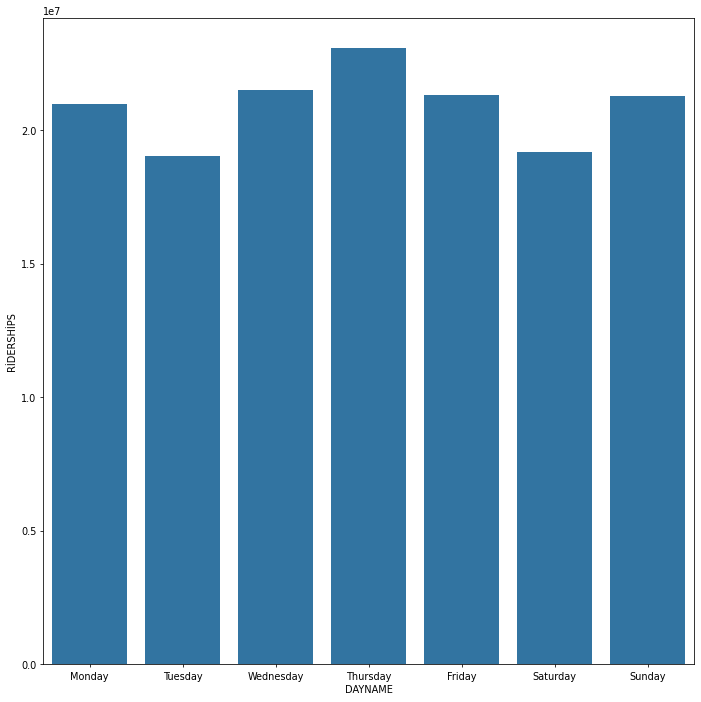

In [32]:
plt.figure(figsize = (12,12),dpi=70)


ax = sns.barplot(data=weekdays,x="Dayname",y="ridership", order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sns.set_color_codes('pastel')
plt.xlabel("DAYNAME")
plt.ylabel("RİDERSHİPS")


In [22]:
_routes_data = date_thisyear.groupby('routes')['ridership'].sum()
_routes = _routes_data.reset_index().sort_values('ridership' , ascending = False).head(15)
_routes

,routes,ridership
27,7,8745980
3,1,8259695
26,6,8249052
16,"3,C,1,2,S,7,F,M,E,N,R,Q,,B,W,A,D",7577963
9,"3,1,2",5079308
25,"5,S,4,7,6",4246129
69,L,3844487
44,F,3374827
56,"F,M,N,R,Q,B,W,D",3307866
6,"2,5",3287612


Text(0, 0.5, 'ROUTES')

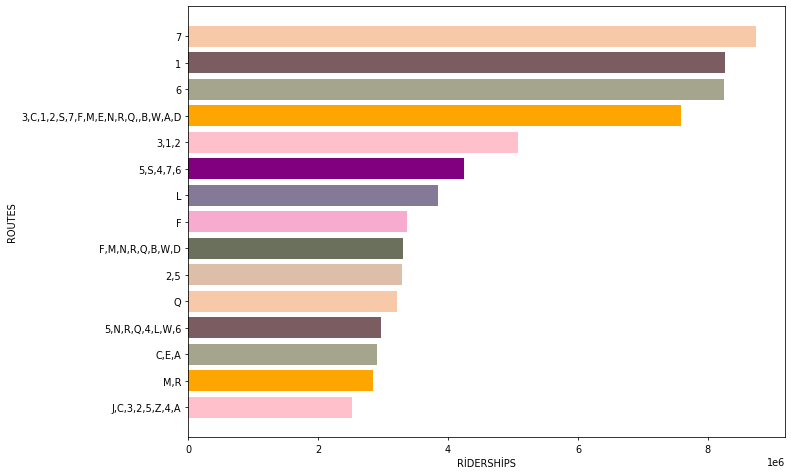

In [23]:
plt.figure(figsize = (11,8),dpi=70)
plt.barh(_routes.routes,_routes.ridership , color = ['#f8c9a8','#7A5C61','#A5A58D','orange','pink','purple','#847997','#F7ACCF','#6B705C','#DDBEA9']);
plt.gca().invert_yaxis()
plt.xlabel("RİDERSHİPS")
plt.ylabel("ROUTES")

In [33]:
_station_data = date_thisyear.groupby('borough')['ridership'].sum()
_station = _station_data.reset_index().sort_values('ridership' , ascending = False)
_station

,borough,ridership
2,M,86296154
0,BK,28555962
3,Q,22875401
1,BX,8412918
4,SI,289914


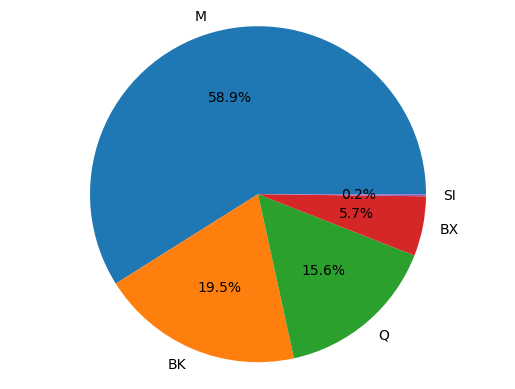

In [34]:
labels = _station['borough']
sizes = _station['ridership']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [13]:
day_ridership = date_thisyear.time.value_counts()
day_ridership #saat bazlı toplam veriler

time
03:00:00 PM    45168
04:00:00 PM    45155
01:00:00 PM    45141
05:00:00 PM    45139
08:00:00 AM    45123
02:00:00 PM    45123
11:00:00 AM    45111
07:00:00 AM    45107
09:00:00 AM    45100
12:00:00 PM    45095
10:00:00 AM    45091
06:00:00 PM    45080
06:00:00 AM    45055
07:00:00 PM    45033
08:00:00 PM    44969
09:00:00 PM    44916
05:00:00 AM    44739
10:00:00 PM    44685
11:00:00 PM    43964
04:00:00 AM    43155
12:00:00 AM    42052
03:00:00 AM    39399
01:00:00 AM    38969
02:00:00 AM    37820
Name: count, dtype: int64

In [16]:
_times_data = date_thisyear.groupby("time")['ridership'].sum()
_times = _times_data.reset_index().sort_values("ridership", ascending = False)
def map_time_to_interval(time):
    if time < '04:00:00 AM':
        return '00:00 - 04:00'
    elif time < '08:00:00 AM':
        return '04:00 - 08:00'
    elif time < '12:00:00 PM':
        return '08:00 - 12:00'
    elif time < '16:00:00 PM':
        return '12:00 - 16:00'
    elif time < '20:00:00 PM':
        return '16:00 - 20:00'
    else:
        return '20:00 - 00:00'

_times['time'] = _times['time'].apply(map_time_to_interval)
_times

,time,ridership
9,04:00 - 08:00,14279557
7,04:00 - 08:00,12305513
11,04:00 - 08:00,11290101
14,08:00 - 12:00,11083156
5,00:00 - 04:00,10772975
12,04:00 - 08:00,8980034
3,00:00 - 04:00,8850354
16,08:00 - 12:00,7839567
13,04:00 - 08:00,7576776
1,00:00 - 04:00,7471717


Text(0, 0.5, 'RİDERSHİPS')

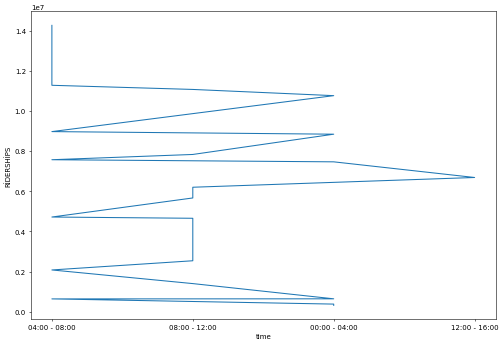

In [20]:
plt.figure(figsize=(12,8),dpi=50)
plt.plot(_times.time,_times.ridership);
plt.xlabel("time")
plt.ylabel("RİDERSHİPS")


In [3]:
womendf = pd.read_csv('nyc_census.csv')
print(womendf)

      CensusTract    County        Borough  TotalPop   Men  Women  Hispanic  \
0     36005000100     Bronx          Bronx      7703  7133    570      29.9   
1     36005000200     Bronx          Bronx      5403  2659   2744      75.8   
2     36005000400     Bronx          Bronx      5915  2896   3019      62.7   
3     36005001600     Bronx          Bronx      5879  2558   3321      65.1   
4     36005001900     Bronx          Bronx      2591  1206   1385      55.4   
...           ...       ...            ...       ...   ...    ...       ...   
2162  36085030302  Richmond  Staten Island      6279  3093   3186      35.8   
2163  36085031901  Richmond  Staten Island      2550   953   1597      27.1   
2164  36085031902  Richmond  Staten Island      4611  2043   2568      20.9   
2165  36085032300  Richmond  Staten Island      1131   597    534      45.5   
2166  36085990100  Richmond  Staten Island         0     0      0       NaN   

      White  Black  Native  ...  Construction  Prod

In [4]:
columns_to_drop = ['CensusTract', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Poverty', 'ChildPoverty', 'Professional', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Unemployment', 'Service']
womendf_new = womendf.drop(columns=columns_to_drop )
womendf_new
#inplace i yazdığımda none değeri döndürüyor



,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
0,Bronx,Bronx,7703,7133,570,NaN,2440.0
1,Bronx,Bronx,5403,2659,2744,72034,22180.0
2,Bronx,Bronx,5915,2896,3019,74836,27700.0
3,Bronx,Bronx,5879,2558,3321,32312,17526.0
4,Bronx,Bronx,2591,1206,1385,37936,17986.0
...,...,...,...,...,...,...,...
2162,Richmond,Staten Island,6279,3093,3186,76542,25189.0
2163,Richmond,Staten Island,2550,953,1597,25064,12753.0
2164,Richmond,Staten Island,4611,2043,2568,22656,16303.0
2165,Richmond,Staten Island,1131,597,534,56406,34261.0


In [5]:
womendf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   County        2167 non-null   object 
 1   Borough       2167 non-null   object 
 2   TotalPop      2167 non-null   int64  
 3   Men           2167 non-null   int64  
 4   Women         2167 non-null   int64  
 5   Income        2110 non-null   object 
 6   IncomePerCap  2121 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 118.6+ KB


In [6]:
womendf_new['Income'].fillna(womendf_new['Income'].mean(),inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [7]:
# 'Income' sütununu sayısal veri türüne dönüştürdükten sonra gruplama işlemini yeniden gerçekleştirdim
# 'Income' sütunu üzerinde sıralama işlemini yeniden gerçekleştirdim
womendf_new['Income'] = pd.to_numeric(womendf_new['Income'], errors='coerce')
womendf_new['Income'].fillna(womendf_new['Income'].mean(), inplace=True)


In [11]:
# 'IncomePerCap' sütununu sayısal veri türüne dönüştürdükten sonra gruplama işlemini yeniden gerçekleştirdim
# 'IncomePerCap' sütunu üzerinde sıralama işlemini yeniden gerçekleştirdim

womendf_new['IncomePerCap'] = pd.to_numeric(womendf_new['IncomePerCap'], errors='coerce')
womendf_new['IncomePerCap'].fillna(womendf_new['IncomePerCap'].mean(), inplace=True)

In [12]:
womendf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   County        2167 non-null   object 
 1   Borough       2167 non-null   object 
 2   TotalPop      2167 non-null   int64  
 3   Men           2167 non-null   int64  
 4   Women         2167 non-null   int64  
 5   Income        2167 non-null   float64
 6   IncomePerCap  2167 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 118.6+ KB


In [20]:
womendf_new.isna().sum()

County          0
Borough         0
TotalPop        0
Men             0
Women           0
Income          0
IncomePerCap    0
dtype: int64

In [21]:
womendf_new.dropna(how = 'any', inplace=True)
womendf_new.head(10)

,County,Borough,TotalPop,Men,Women,Income,IncomePerCap
0,Bronx,Bronx,7703,7133,570,59101.3208,2440.0
1,Bronx,Bronx,5403,2659,2744,72034.0000,22180.0
2,Bronx,Bronx,5915,2896,3019,74836.0000,27700.0
3,Bronx,Bronx,5879,2558,3321,32312.0000,17526.0
4,Bronx,Bronx,2591,1206,1385,37936.0000,17986.0
5,Bronx,Bronx,8516,3301,5215,18086.0000,12023.0
6,Bronx,Bronx,4774,2130,2644,14479.0000,9781.0
7,Bronx,Bronx,150,109,41,59101.3208,49365.0
8,Bronx,Bronx,5355,2338,3017,17226.0000,11493.0
9,Bronx,Bronx,3016,1375,1641,20153.0000,10317.0


In [22]:
nys_population = womendf_new.groupby('Borough').sum().sort_values('Women', ascending=False).reset_index()
nys_population.head(10)
#new york ta en fazla popülasyonun olduğu ilçeleri bulduk

,Borough,County,TotalPop,Men,Women,Income,IncomePerCap
0,Brooklyn,KingsKingsKingsKingsKingsKingsKingsKingsKingsK...,2595259,1229001,1366258,4.135847e+07,2.125370e+07
1,Queens,QueensQueensQueensQueensQueensQueensQueensQuee...,2301139,1115459,1185680,4.161601e+07,1.856710e+07
2,Manhattan,New YorkNew YorkNew YorkNew YorkNew YorkNew Yo...,1629507,769434,860073,2.369010e+07,1.971292e+07
3,Bronx,BronxBronxBronxBronxBronxBronxBronxBronxBronxB...,1428357,672447,755910,1.352440e+07,6.642300e+06
4,Staten Island,RichmondRichmondRichmondRichmondRichmondRichmo...,472481,228703,243778,7.883576e+06,3.522751e+06


In [23]:
womendf_new['IncomePerCap'] = pd.to_numeric(womendf_new['IncomePerCap'], errors='coerce')
nys = womendf_new.groupby('Borough')['IncomePerCap'].mean().reset_index()
nys = nys.sort_values('IncomePerCap', ascending=False)
nys


,Borough,IncomePerCap
2,Manhattan,68447.649397
4,Staten Island,32025.013056
1,Brooklyn,27928.645070
3,Queens,27753.517960
0,Bronx,19593.805765
